In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

In [3]:
# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
# Load dataset
file_path = "IMDb Movies India.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [7]:
# Display basic info
df.info()
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance

In [9]:
# Display first few rows to check column names
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [11]:
# Check for missing essential columns
required_columns = ['Genre', 'Director', 'Actor 1', 'Year', 'Duration', 'Votes', 'Rating', 'Name']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Error: Missing columns in dataset: {missing_columns}")
    exit()

In [13]:
# Data Cleaning
df = df.drop_duplicates()
df['Year'] = pd.to_numeric(df['Year'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
df['Duration'] = pd.to_numeric(df['Duration'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'].astype(str).str.replace(',', ''), errors='coerce')

In [15]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
df[['Year', 'Duration', 'Votes', 'Rating']] = imputer.fit_transform(df[['Year', 'Duration', 'Votes', 'Rating']])

df = df.dropna(subset=['Genre', 'Director', 'Actor 1'])


In [17]:
# Feature Engineering
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_features = ['Genre', 'Director', 'Actor 1']
df_categorical = df[categorical_features].astype(str)
df_encoded = encoder.fit_transform(df_categorical)
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(categorical_features), index=df.index)

In [19]:
# Combine features
df = df.drop(columns=categorical_features)
df = pd.concat([df, df_encoded], axis=1)


In [21]:
# Train-test split
X = df.drop(columns=['Name', 'Rating'])
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Ensure only numeric values before scaling
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

In [25]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Predictions
y_pred = model.predict(X_test)

In [31]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [33]:
# Display results
print("Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

Model Evaluation Results:
Mean Absolute Error (MAE): 0.53
Root Mean Squared Error (RMSE): 0.89
R-squared Score (R²): 0.33


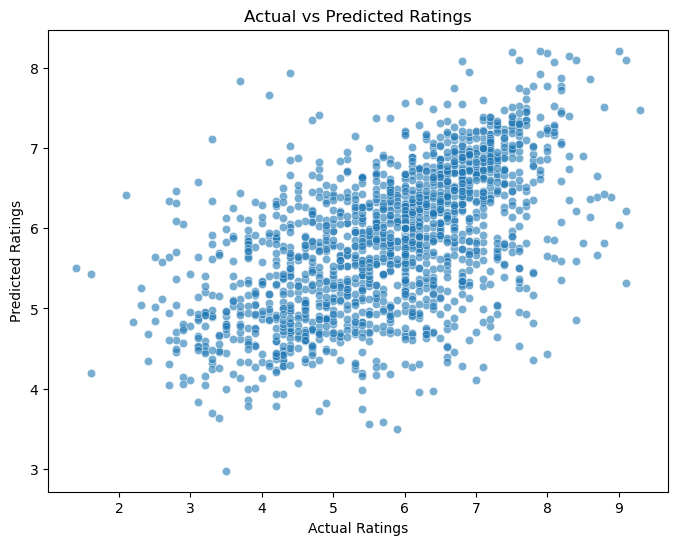

In [35]:
# Plot actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()


In [37]:
# Display first few actual vs predicted values
results_df = pd.DataFrame({"Actual Rating": y_test.values, "Predicted Rating": y_pred})
print("\nSample Predictions:")
print(results_df.head())



Sample Predictions:
   Actual Rating  Predicted Rating
0            6.0             6.000
1            7.1             6.368
2            4.4             4.706
3            2.8             4.711
4            6.7             6.301


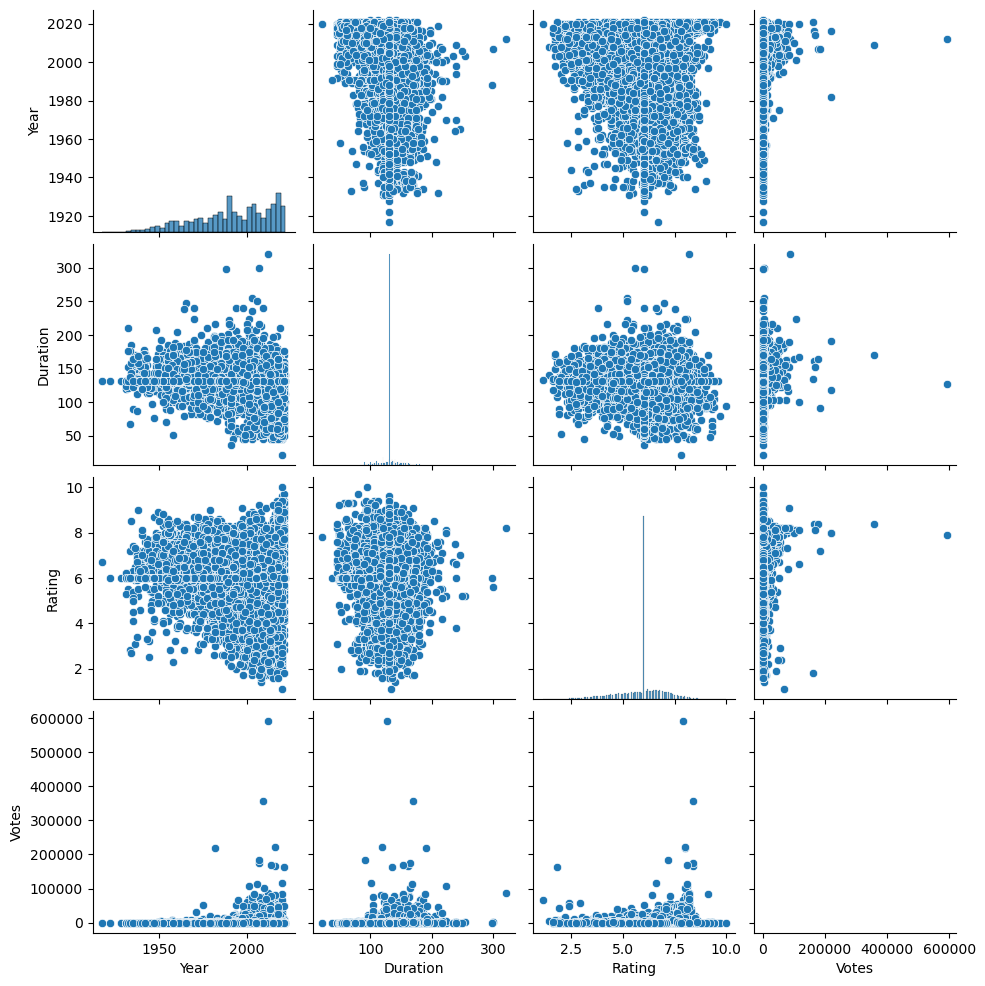

In [39]:


import seaborn as sns
import matplotlib.pyplot as plt

# Ensure "Year" and "Duration" are strings before extracting numbers
df["Year"] = df["Year"].astype(str).str.extract("(\d{4})").astype(float)
df["Duration"] = df["Duration"].astype(str).str.extract("(\d+)").astype(float)

# Convert "Votes" and "Rating" to numeric values
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce")
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Select numerical columns for the pair plot
num_cols = ["Year", "Duration", "Rating", "Votes"]

# Drop rows with missing values in numerical columns
df_cleaned = df[num_cols].dropna()

# Generate pair plot
sns.pairplot(df_cleaned)
plt.show()



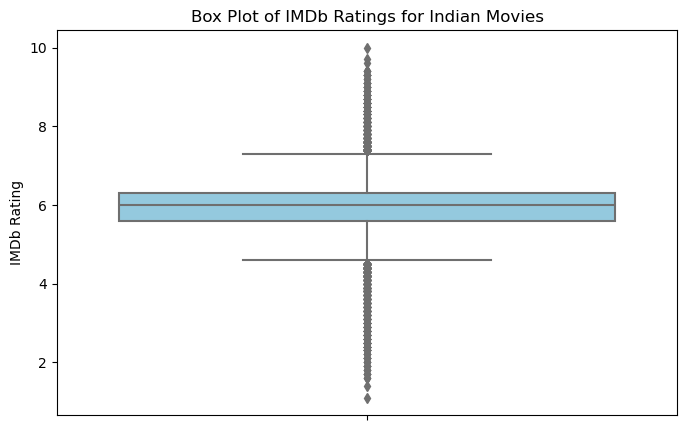

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns

# Convert Rating column to numeric (handling errors)
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Create the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Rating"], color="skyblue")

# Add labels and title
plt.ylabel("IMDb Rating")
plt.title("Box Plot of IMDb Ratings for Indian Movies")

# Show the plot
plt.show()


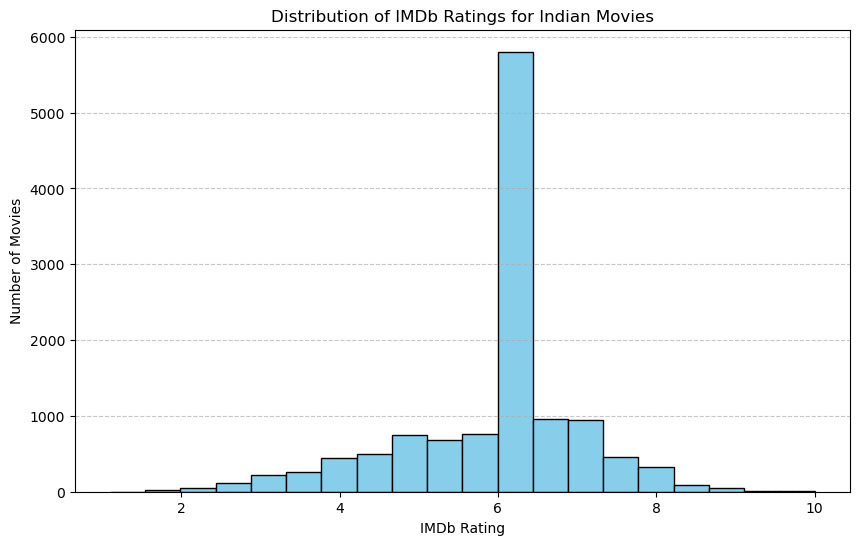

In [43]:

import matplotlib.pyplot as plt

# Drop NaN values from the Rating column
ratings = df["Rating"].dropna()

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("IMDb Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of IMDb Ratings for Indian Movies")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
